# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

# Importing necessary libraries and data

In [ ]:
#==============================================#
#---- Created by: Huy Benjamin Pham -----------#
#==============================================#

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

# Data Overview

- Observations
- Sanity checks

In [ ]:
visa = pd.read_csv("EasyVisa.csv")
visa.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
#due to changes will be made to the dataset - creating a copy
data = visa.copy()

### Checking head and tail

In [ ]:
#First 5 rows
data.head()


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
#last 5 rows
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


### Data Shape:

In [ ]:
data.shape

(25480, 12)

Shape = 25480 rows | 12 Columns

### Verify data types:

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
#checking for duplicates
data.duplicated().sum()

0

No Duplicate found


# Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

### Check statistical summarry

In [ ]:
#statistical summarry
data.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


### Adjust Negative values in number of employees columns

In [ ]:
data.loc[data["no_of_employees"] < 0, "no_of_employees"] = 0

In [ ]:
# taking absolute values for number of employees
data["no_of_employees"] = abs(data["no_of_employees"])

### Verify the count of each unique catagory in each of the categorical variables

In [ ]:
#making a list of categorical variables
cat_var = list(data.select_dtypes(include="object").columns)

#printing
for column in cat_var:
  print(data[column].value_counts())
  print("-" *50)

case_id
EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: count, Length: 25480, dtype: int64
--------------------------------------------------
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
--------------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
--------------------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
--------------------------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
--------------------------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      

In [ ]:
#checking the number of unique values
data['case_id'].nunique()

25480

Observation: total of unique values = 25480

In [ ]:
#drop 'case_id' column from the data
data.drop('case_id', axis=1, inplace=True)


## Univariate Analysis:


In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-")
      # Add median to the histogram
    plt.show()


### Observation on number of employee:

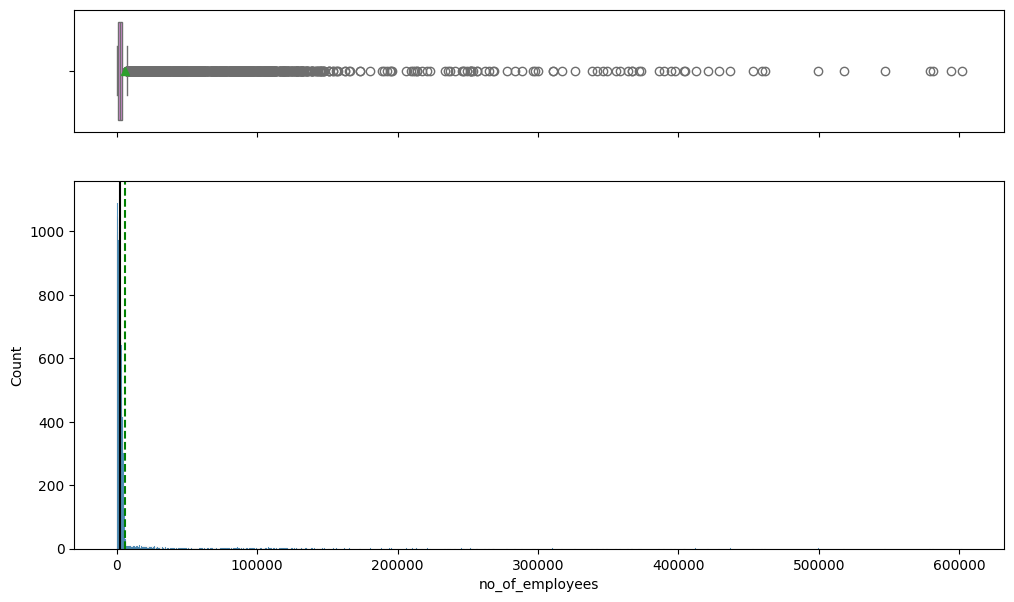

In [ ]:
histogram_boxplot(data, "no_of_employees")

### Observation on prevailing wage:


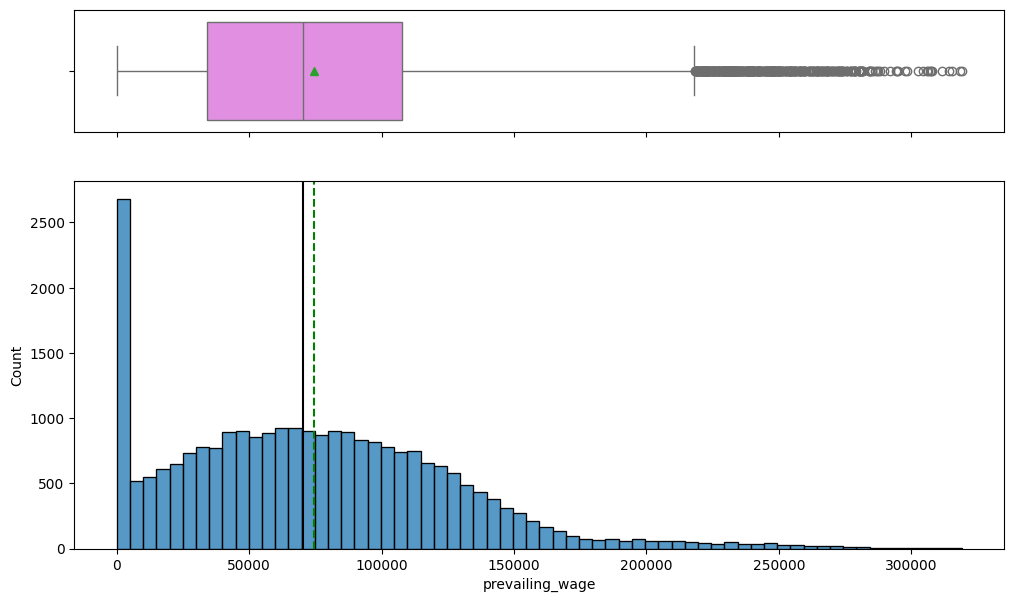

In [ ]:
# histogram_boxplot for prevailing wage
histogram_boxplot(data, "prevailing_wage")

In [ ]:
#checking number of rows less than 100 prevailing wage
data.loc[data['prevailing_wage'] < 100]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
338,Asia,Bachelor's,Y,N,2114,2012,Northeast,15.7716,Hour,Y,Certified
634,Asia,Master's,N,N,834,1977,Northeast,3.3188,Hour,Y,Denied
839,Asia,High School,Y,N,4537,1999,West,61.1329,Hour,Y,Denied
876,South America,Bachelor's,Y,N,731,2004,Northeast,82.0029,Hour,Y,Denied
995,Asia,Master's,N,N,302,2000,South,47.4872,Hour,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25023,Asia,Bachelor's,N,Y,3200,1994,South,94.1546,Hour,Y,Denied
25258,Asia,Bachelor's,Y,N,3659,1997,South,79.1099,Hour,Y,Denied
25308,North America,Master's,N,N,82953,1977,Northeast,42.7705,Hour,Y,Denied
25329,Africa,Bachelor's,N,N,2172,1993,Northeast,32.9286,Hour,Y,Denied


Observation: total of 176 rows


In [ ]:
#count of the values in the prevailing wage
data.loc[data['prevailing_wage'] < 100, 'prevailing_wage'].value_counts()

prevailing_wage
15.7716    1
3.3188     1
25.0117    1
96.1061    1
11.4219    1
          ..
45.9315    1
5.6396     1
74.4049    1
84.9745    1
54.9196    1
Name: count, Length: 176, dtype: int64

Total of 176 counts of prevailing wage

In [ ]:
# create function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))
    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category
        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

        plt.show()


### Observation on continent


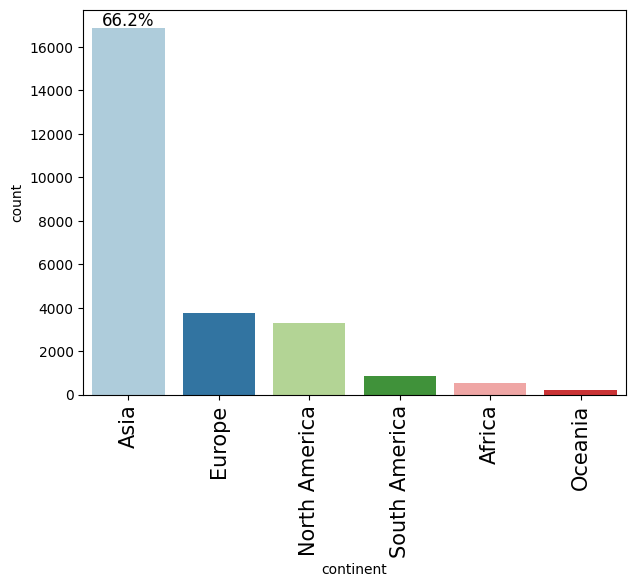

In [ ]:
labeled_barplot(data, "continent", perc=True)

Observation: Most application mostly comes from Asia, 2nd place is Europe but the amount of application is only 1/4 of the 1st place.

### Observation on education of employee


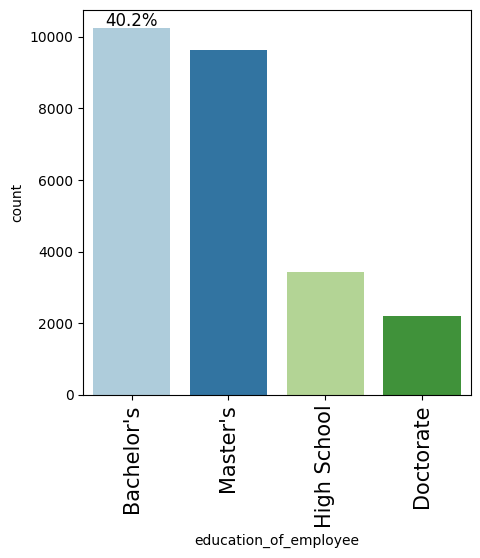

In [ ]:
labeled_barplot(data, "education_of_employee", perc=True)

### Observation on job experience

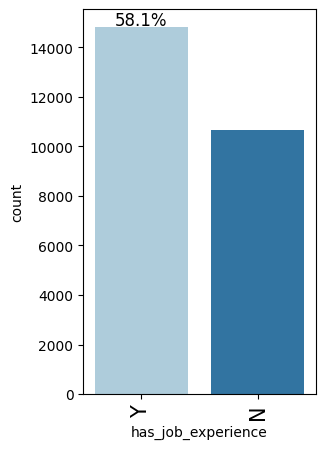

In [ ]:
labeled_barplot(data, "has_job_experience", perc=True)

### Observation on job training


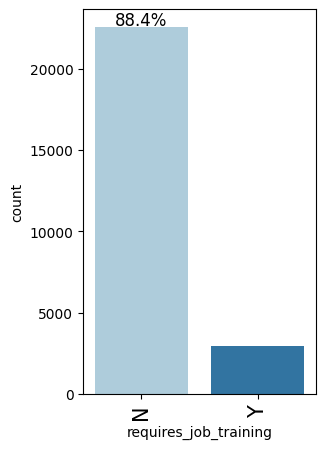

In [ ]:
labeled_barplot(data, "requires_job_training", perc=True)

### Observation on region of employment

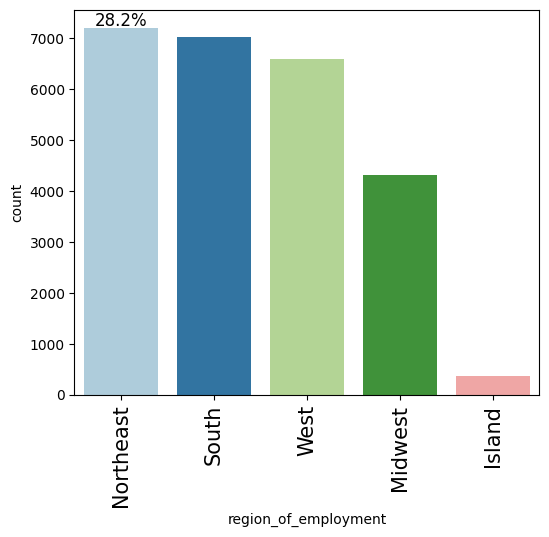

In [ ]:
labeled_barplot(data, "region_of_employment", perc=True)

### Observation on unit of wage

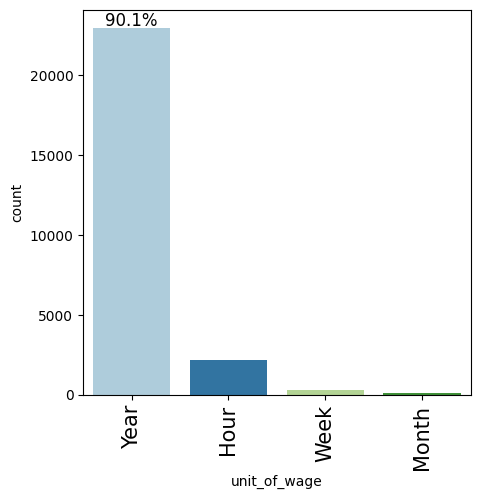

In [ ]:
labeled_barplot(data, "unit_of_wage", perc=True)

### Observation on case status

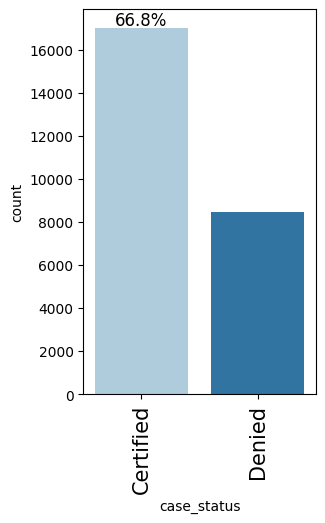

In [ ]:
labeled_barplot(data, "case_status", perc=True)

## Bivariate Analysis:

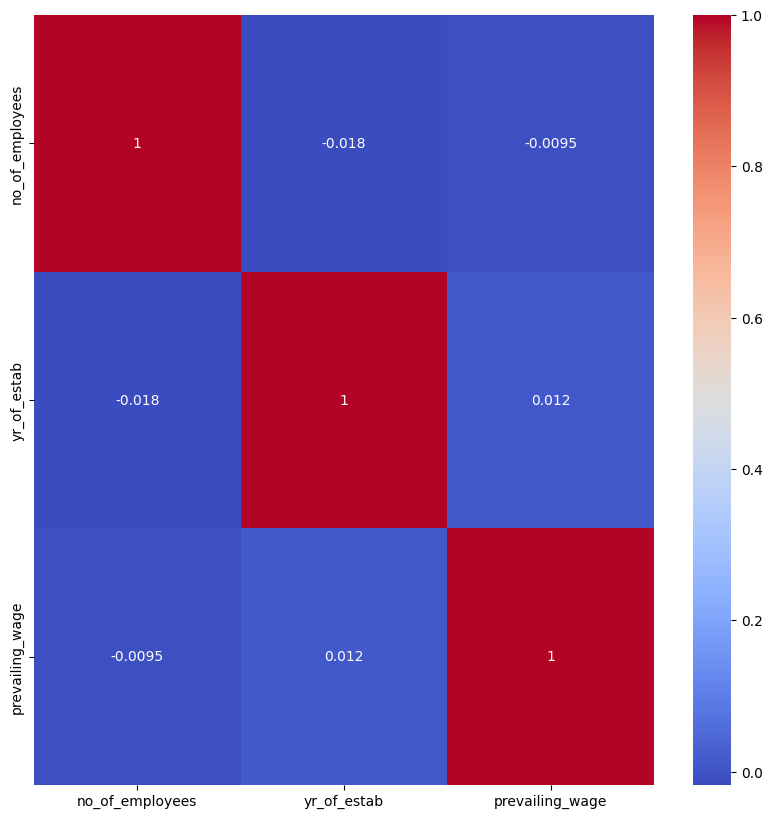

In [ ]:
#correlation between vaiables
col_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10,10))
sns.heatmap(data[col_list].corr(), annot=True, cmap='coolwarm')
plt.show()

Observation: Highest Correlation = Year of establish vs. prevailing wage

**Creating function to help with further analysis:**

In [ ]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="blue",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="red",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


#### Education vs visa cerfication:

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


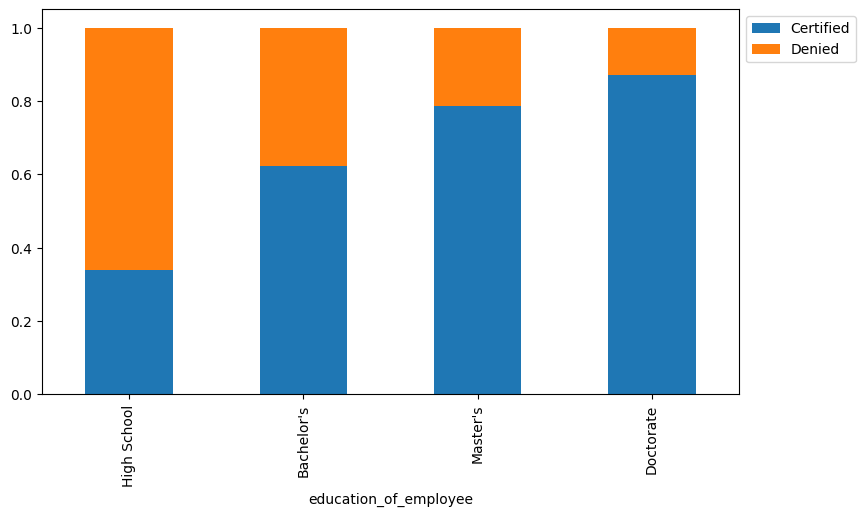

In [ ]:
stacked_barplot(data, "education_of_employee", "case_status")


Observation: The higher the education, the better chances candidate will get certified.

### Education vs Region:


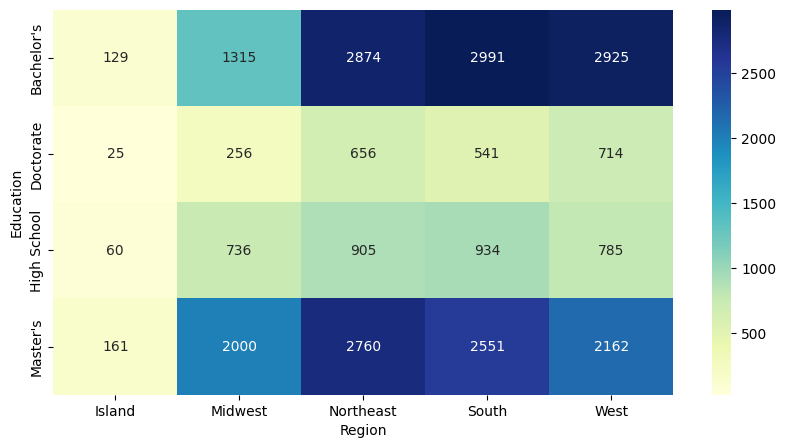

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(
    pd.crosstab(data["education_of_employee"], data["region_of_employment"]),
    annot=True,
    cmap="YlGnBu",
    fmt="d",
)
plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

### Visa Certification vs. Region:

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


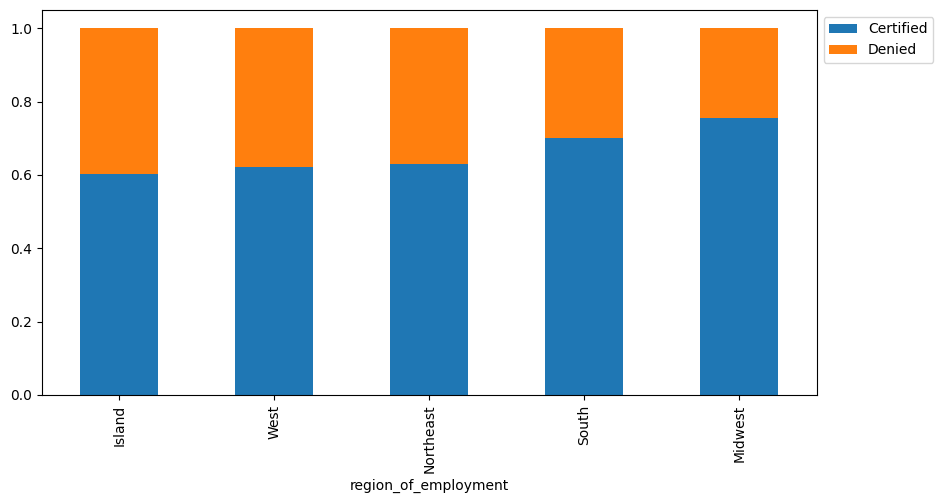

In [ ]:
stacked_barplot(data, "region_of_employment", "case_status")

### Visa Certification vs. Different continents

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


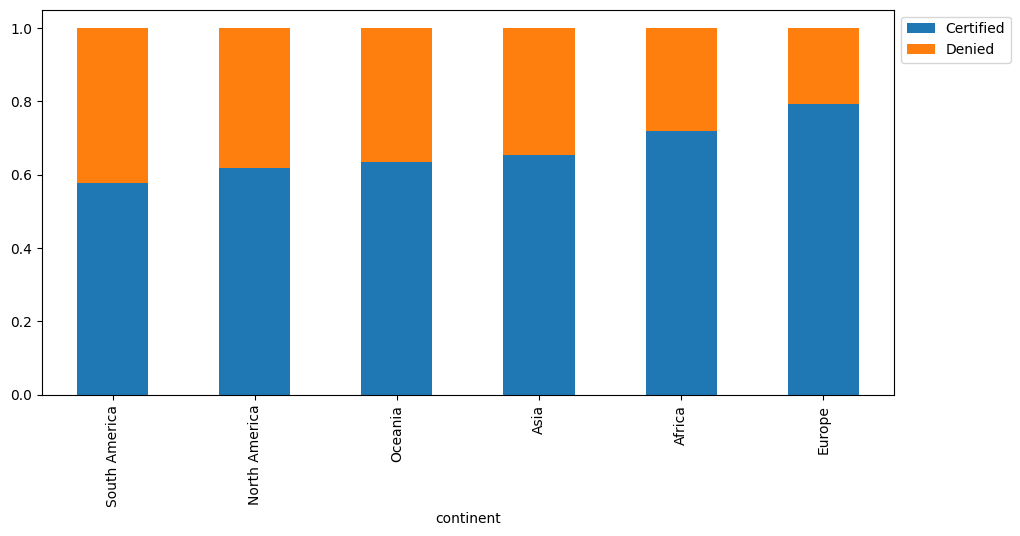

In [ ]:
stacked_barplot(data, "continent", "case_status")

### Visa Certification vs Work Experience:

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


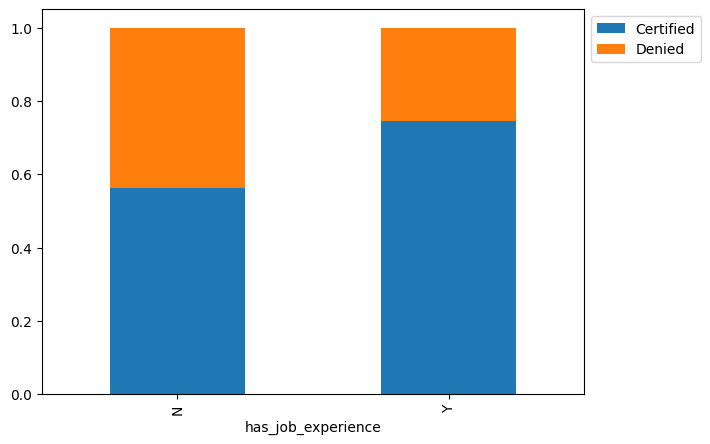

In [ ]:
stacked_barplot(data, "has_job_experience", "case_status")

### Visa Certificaiton vs Job Training Required

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


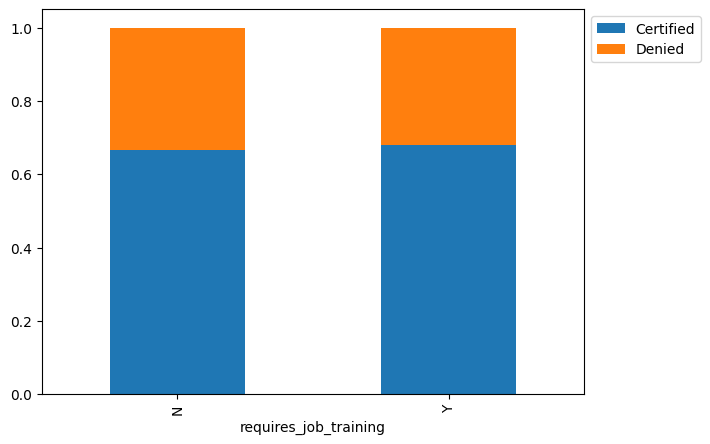

In [ ]:
stacked_barplot(data, "requires_job_training", "case_status")

### Visa Certification vs. Prevailing Wage:

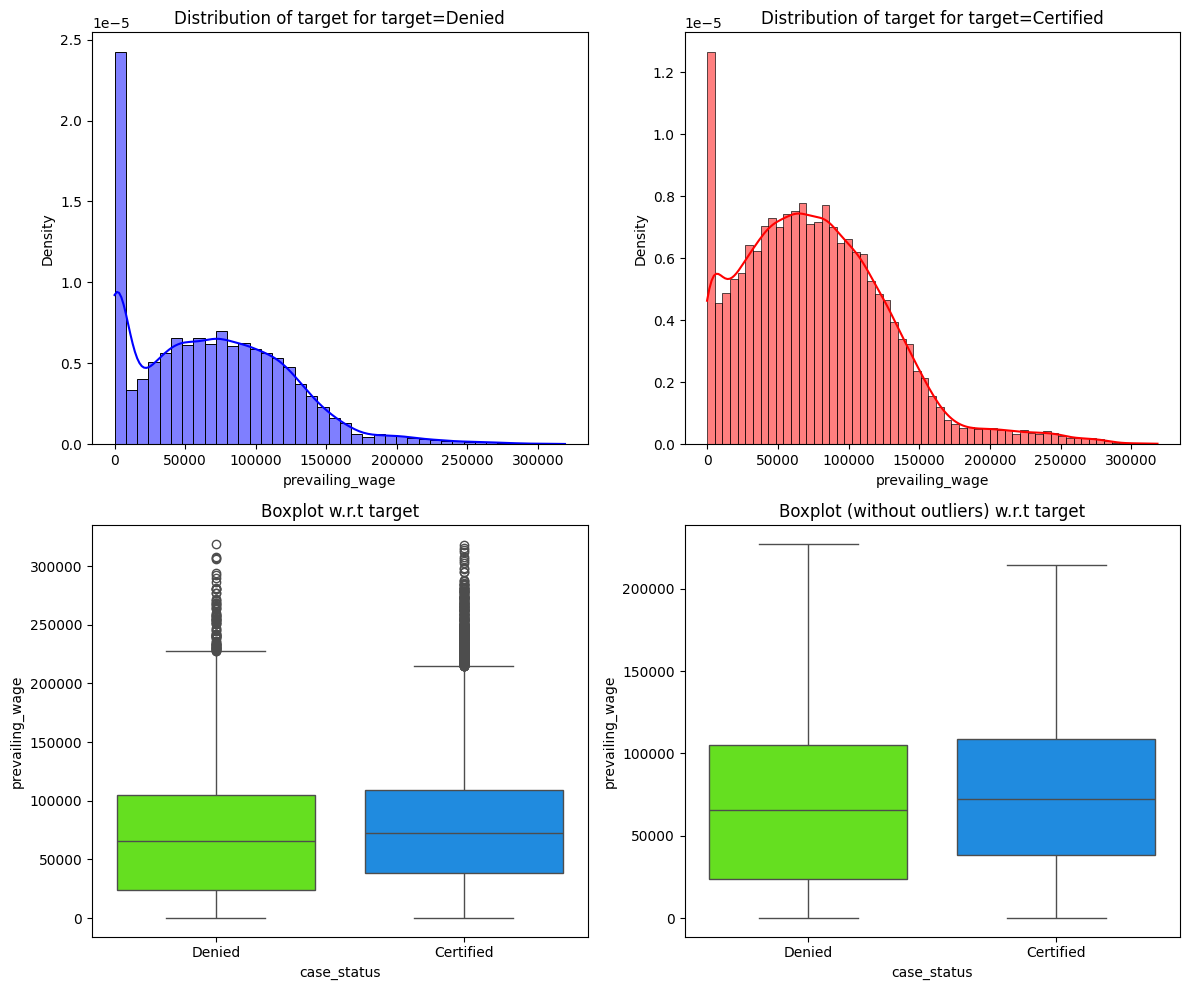

In [ ]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

### Prevailing Wage vs. Regions

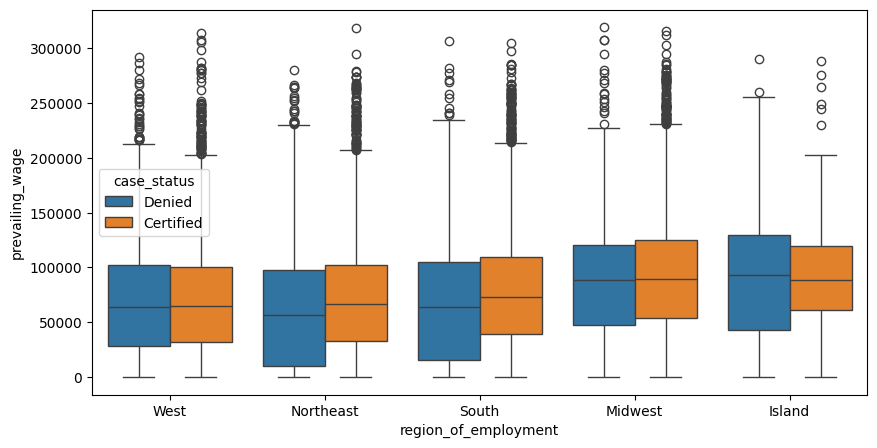

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="region_of_employment", y="prevailing_wage", hue="case_status")
plt.show()

### Unit of Wage vs. Visa Certification:


case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


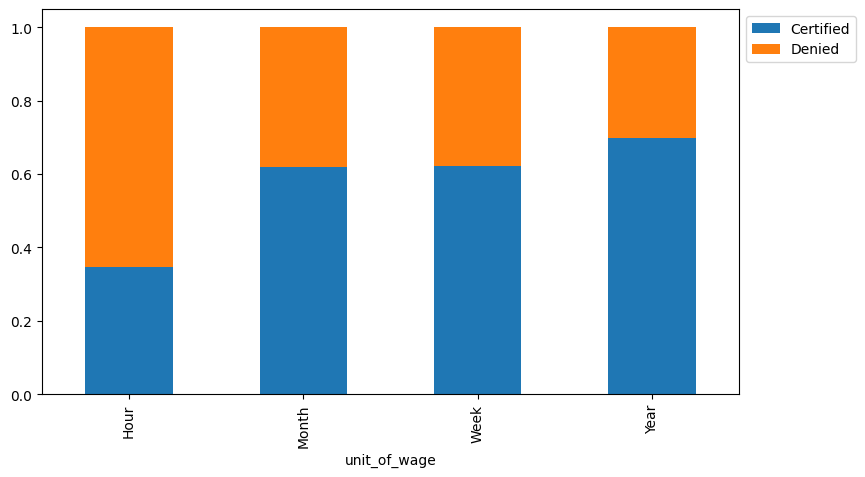

In [ ]:
#stacked barplot for unit of wage and case status
stacked_barplot(data, "unit_of_wage", "case_status")

# Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Check for outliers:

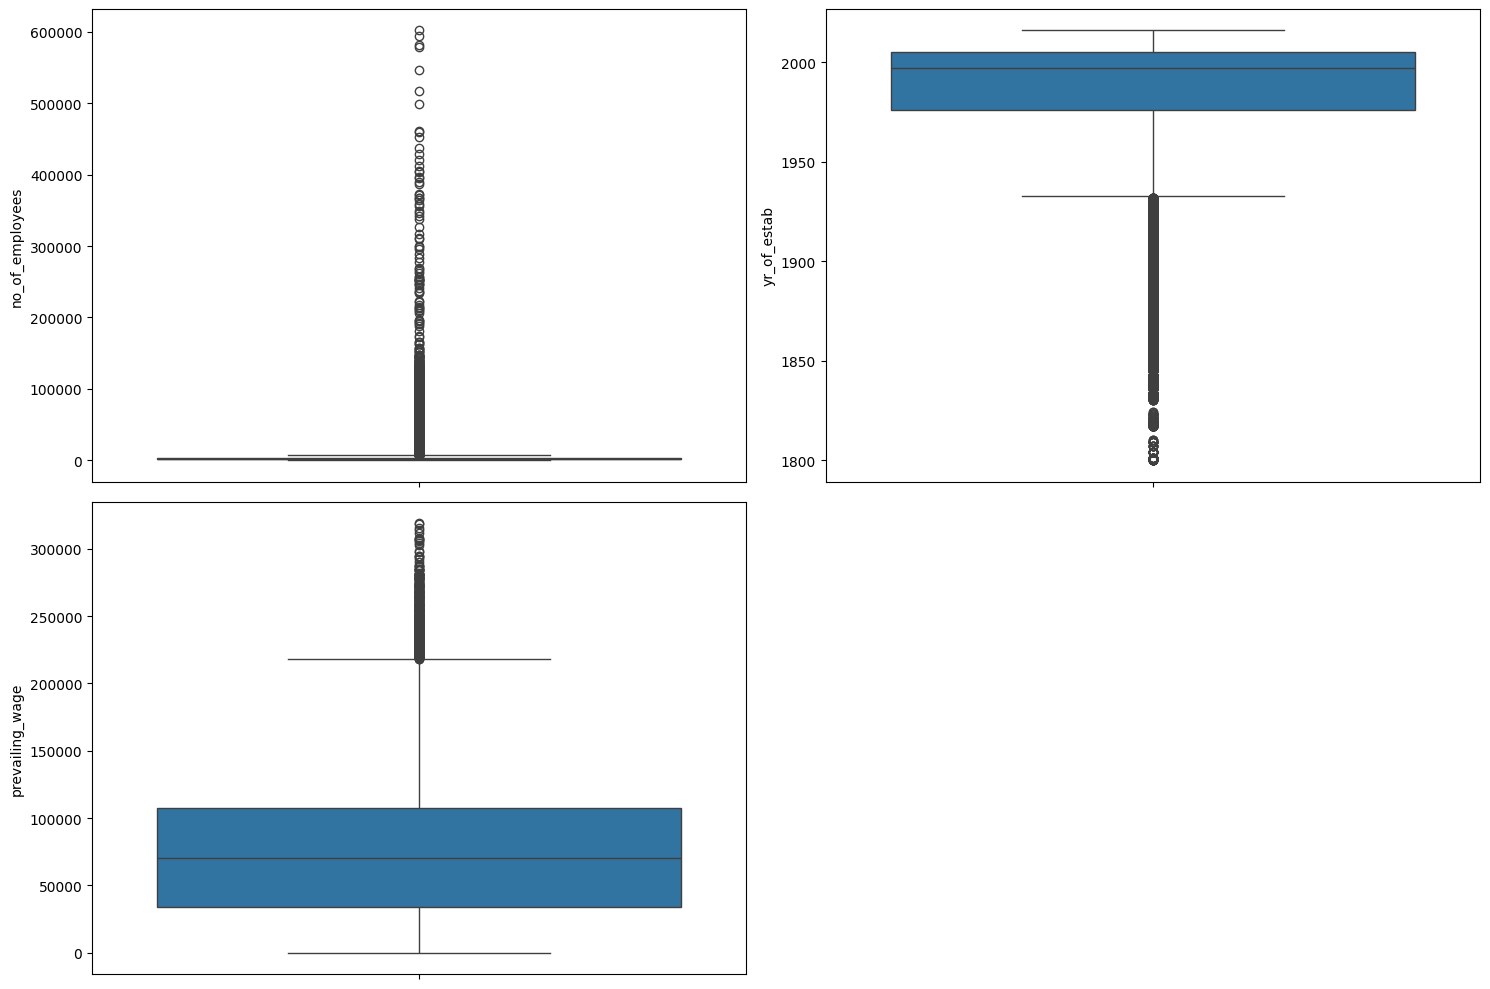

In [ ]:
#use boxlplot to find outliers
num_column = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))

for i, col in enumerate(num_column, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data[col])
    plt.tight_layout()

plt.show()

# Prepping Data:

In [ ]:
data['case_status'] = data['case_status'].apply(lambda x: 1 if x == 'Certified' else 0)

X = data.drop('case_status', axis=1)
y = data['case_status']

X = pd.get_dummies(X, drop_first=True) #getting dummy variables

#split data in train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
print('Shape of Training dataset:\n', X_train.shape)
print('Shape of Testing dataset:\n', X_test.shape)
print('Percentage of classes in training set:')
print(y_train.value_counts(normalize=True))
print('Percentage of classes in test set:')
print(y_test.value_counts(normalize=True))

Shape of Training dataset:
 (17836, 21)
Shape of Testing dataset:
 (7644, 21)
Percentage of classes in training set:
case_status
1    0.667919
0    0.332081
Name: proportion, dtype: float64
Percentage of classes in test set:
case_status
1    0.667844
0    0.332156
Name: proportion, dtype: float64


## Model Evaluation:

### Possible wrong prediction:
- VISA application can get certified, but could get denied in reality.
- Visa application may not get certified, but can get certified in reality.

### What case should we consider?
- Short answer is BOTH:
  
  - If an unqualified employee gets the job. That means a US Citizen may lost that opportunity
  - If an overqualified or qualified employee cannot gets the job. The US may loose out on top talent

### Loss reduction:
- ```F1_Score``` can be used for evaluation: higher `F1_score` = Minimized False Negative & False Positive
- Balance class weight will be used to focus equally on both classses




In [ ]:
#define fucntion
def model_performance_classification_sklearn (model, predictors, target):
  '''
  Function to compute different metrics to check classification model performance

  model: classifier
  predictors: independent variables
  target: dependent variable
  '''
  # predicting using the independent variables
  pred = model.predict(predictors)

  acc = accuracy_score(target, pred)  # to compute Accuracy
  recall = recall_score(target, pred)  # to compute Recall
  precision = precision_score(target, pred)  # to compute Precision
  f1 = f1_score(target, pred)  # to compute F1-score

  # creating a dataframe of metrics
  df_perf = pd.DataFrame(
      {
          "Accuracy": acc,
          "Recall": recall,
          "Precision": precision,
          "F1": f1,
      },
      index=[0],
  )

  return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
  '''
  To plot the Confusion Matrix
  model: classifier
  predictors: independent variables
  target: dependent variable
  '''
  y_pred = model.predict(predictors)
  cm = confusion_matrix(target, y_pred)
  labels = np.asarray(
      [
          ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
          for item in cm.flatten()]
      ).reshape(2, 2)

  plt.figure(figsize=(6, 4))
  sns.heatmap(cm, annot=labels, fmt="")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.show()

# Decision Tree: Building Model + Hyperparameter Tuning

## Decision Tree:

In [ ]:
#define decision tree classifier with Random state = 1
dt = DecisionTreeClassifier(random_state=1)

#fitting decision tree on train data
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Checking Model performance (Training):

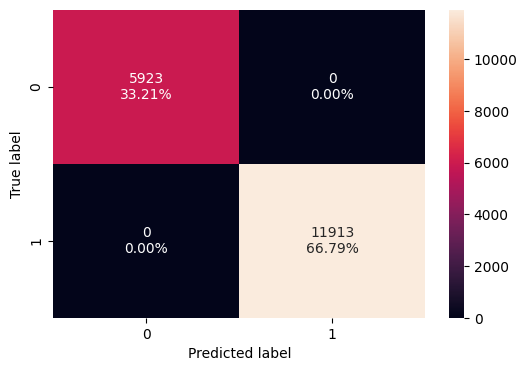

In [ ]:
#create confusion matrix for training data
confusion_matrix_sklearn(dt, X_train, y_train)

In [ ]:
#check performance on train data
dt_perf_train = model_performance_classification_sklearn(dt, X_train, y_train)
dt_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [ ]:
#check performance on testing data
dt_perf_test = model_performance_classification_sklearn(dt, X_test, y_test)
dt_perf_test

,Accuracy,Recall,Precision,F1
0,0.664443,0.742605,0.751884,0.747216


## Hyperparameter Tuning - Decision Tree


In [ ]:
# choosen type of classifier.
dt_estimator = DecisionTreeClassifier(class_weight='balanced', random_state=1)

#Parameter GRID
parameter = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

#Type of scoring to compare parameter
scoring = metrics.make_scorer(metrics.f1_score)

# Running Grid search
# Run grid search with n_jobs = -1
dt_grid = GridSearchCV(dt_estimator, param_grid=parameter, scoring=scoring, n_jobs=-1)

#fitting dt_grid on the train data
dt_grid = dt_grid.fit(X_train, y_train)

#set clf to best combination of parameters
dt_estimator = dt_grid.best_estimator_

#fit best algorithm to the dataset
dt_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.0001, random_state=1)

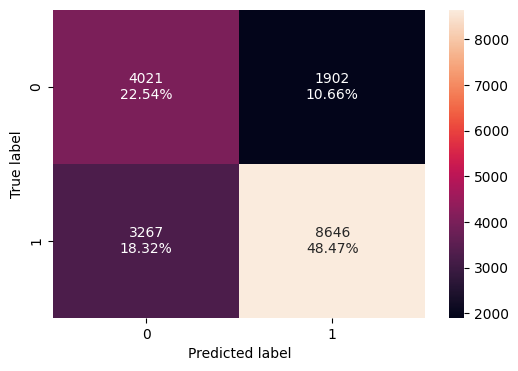

In [ ]:
#create confusion matrix for train data on tuned estimator
confusion_matrix_sklearn(dt_estimator, X_train, y_train)

In [ ]:
#check performance for train data on tuned estimator
dt_perf_train2 = model_performance_classification_sklearn(dt_estimator, X_train, y_train)
dt_perf_train2

,Accuracy,Recall,Precision,F1
0,0.710193,0.725762,0.819681,0.769868


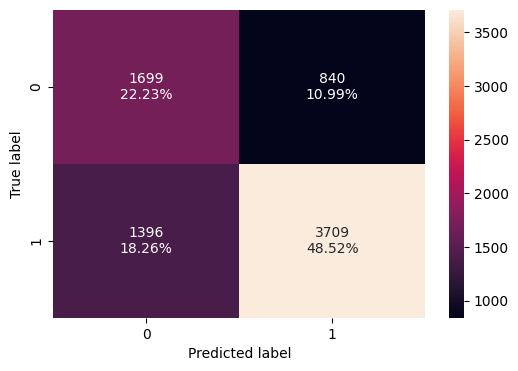

In [ ]:
#create confusion matrix for test data on tuned estimator
confusion_matrix_sklearn(dt_estimator, X_test, y_test)

In [ ]:
#check performance for test data on tuned estimator
dt_perf_test2 = model_performance_classification_sklearn(dt_estimator, X_test, y_test)
dt_perf_test2

,Accuracy,Recall,Precision,F1
0,0.707483,0.726543,0.815344,0.768386


# Building bagging and Random Forest

## Bagging Classifier:


In [ ]:
#define bagging classifier with random state = 1
bc = BaggingClassifier(random_state=1)

#fitting bagging classifier on train data
bc.fit(X_train, y_train)

BaggingClassifier(random_state=1)

### Checking model performance on Training set:

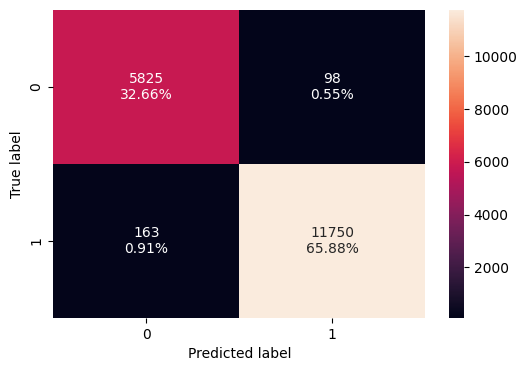

In [ ]:
#create confusion matrix for training data
confusion_matrix_sklearn(bc, X_train, y_train)


In [ ]:
### check performance on training data
bc_perf_train = model_performance_classification_sklearn(bc, X_train, y_train)
bc_perf_train

,Accuracy,Recall,Precision,F1
0,0.985367,0.986317,0.991729,0.989016


### Check performance on testing data


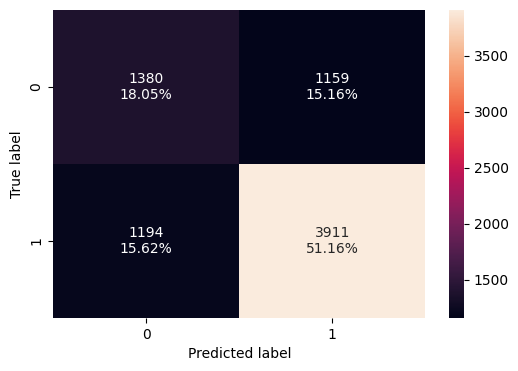

In [ ]:
#create confusion matrix on testing data
confusion_matrix_sklearn(bc, X_test, y_test)

In [ ]:
# checking performance on testing data
bc_perf_test = model_performance_classification_sklearn(bc, X_test, y_test)
bc_perf_test

,Accuracy,Recall,Precision,F1
0,0.692177,0.766112,0.7714,0.768747


## Hyperparameter Tuning - Bagging Classifier


In [ ]:
#Type of classifier
bc_estimator_tuned = BaggingClassifier(random_state=1)

#Parameter grid
parameter =  {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

#Type of scoring to compare parameter
scoring = metrics.make_scorer(metrics.f1_score)

# Running Grid search
# Run grid search with cv = 5
bc_grid = GridSearchCV(bc_estimator_tuned, param_grid=parameter, scoring=scoring, cv=5)

#fitting bc_grid on the train data
bc_grid = bc_grid.fit(X_train, y_train)

#set clf to best combination of parameters
bc_estimator_tuned = bc_grid.best_estimator_

#fit best algorithm to the dataset
bc_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=70,
                  random_state=1)

### Checking performance on Training dataset:

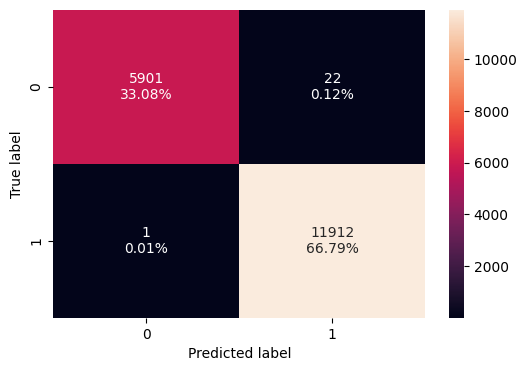

In [ ]:
### create confusion data for training data
confusion_matrix_sklearn(bc_estimator_tuned, X_train, y_train)

In [ ]:
### Check performance on train data
bc_perf_train2 = model_performance_classification_sklearn(bc_estimator_tuned, X_train, y_train)
bc_perf_train2

,Accuracy,Recall,Precision,F1
0,0.99871,0.999916,0.998157,0.999036


### Checking performance on Testing Dataset:

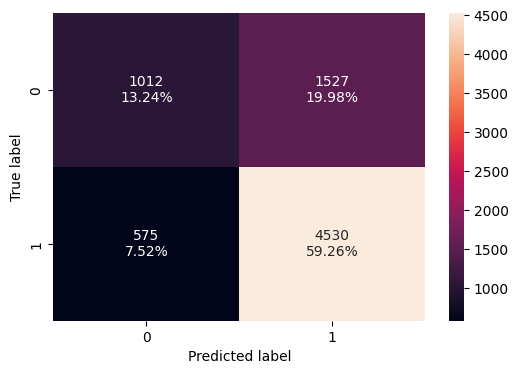

In [ ]:
### create confusion data for testing data
confusion_matrix_sklearn(bc_estimator_tuned, X_test, y_test)

In [ ]:
### checking performance on testing data
bc_perf_test2 = model_performance_classification_sklearn(bc_estimator_tuned, X_test, y_test)
bc_perf_test2

,Accuracy,Recall,Precision,F1
0,0.725013,0.887365,0.747895,0.811682


## Random Forest:


In [ ]:
# define random forest with random state = 1, class_weight = balanced
rf_estmator = RandomForestClassifier(random_state=1, class_weight='balanced')

#fitting random forest on train data
rf_estmator.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

### Checking model performance on training data set:

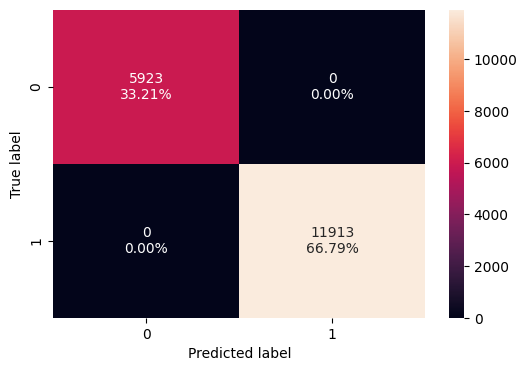

In [ ]:
#confusion matrix for train data
confusion_matrix_sklearn(rf_estmator, X_train, y_train)

In [ ]:
#check performance of train data
rf_perf_train = model_performance_classification_sklearn(rf_estmator, X_train, y_train)
rf_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


### Checking model performance on test data set:

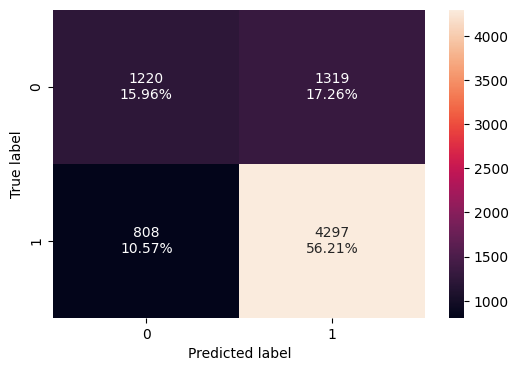

In [ ]:
#confusion matrix for test data
confusion_matrix_sklearn(rf_estmator, X_test, y_test)

In [ ]:
#checking performance on test data
rf_perf_test = model_performance_classification_sklearn(rf_estmator, X_test, y_test)
rf_perf_test


,Accuracy,Recall,Precision,F1
0,0.721743,0.841724,0.765135,0.801604


## Hyperparameter tuning - Random Forest

In [ ]:
#Classifier Type
rf_estimator_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap= True)

rf_parameter = {
     "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)}

#Type of scoring used
scoring = metrics.make_scorer(metrics.f1_score)

#Running Grid search with cv = 5, n_jobs = -1
rf_grid = GridSearchCV(rf_estimator_tuned, param_grid=rf_parameter, scoring=scoring, cv=5, n_jobs=-1)

#fitting rf_grid on the train data
rf_grid = rf_grid.fit(X_train, y_train)

#set clf to best combination of parameters
rf_estimator_tuned = rf_grid.best_estimator_

#fit best algorithm to the dataset
rf_estimator_tuned.fit(X_train, y_train)



RandomForestClassifier(max_samples=0.4, min_samples_leaf=3, n_estimators=110,
                       oob_score=True, random_state=1)

### Check model performance on training data


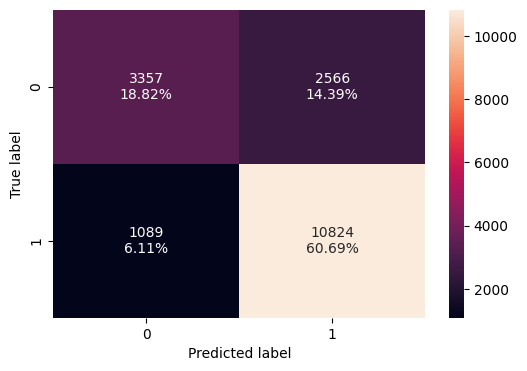

In [ ]:
#confusion matrix on tuned training data
confusion_matrix_sklearn(rf_estimator_tuned, X_train, y_train)

In [ ]:
#Performance check on tuned training data
rf_perf_train2 = model_performance_classification_sklearn(rf_estimator_tuned, X_train, y_train)
rf_perf_train2

,Accuracy,Recall,Precision,F1
0,0.795077,0.908587,0.808364,0.855551


### Check model performance on testing data

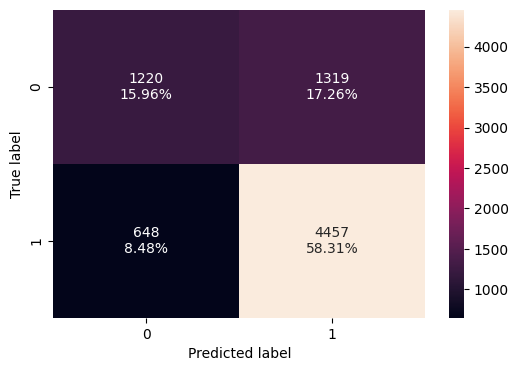

In [ ]:
#confusion matrix on tuned testing data
confusion_matrix_sklearn(rf_estimator_tuned, X_test, y_test)

In [ ]:
#performance check on tuned testing data
rf_perf_test2 = model_performance_classification_sklearn(rf_estimator_tuned, X_test, y_test)
rf_perf_test2

,Accuracy,Recall,Precision,F1
0,0.742674,0.873066,0.771641,0.819226


# Boosting - Model Building and Hyperparameter Tuning:

## AdaBoost Classifier:

In [ ]:
#define Adaboost Classifier with random state = 1
ada = AdaBoostClassifier(random_state=1)

#fitting Adaboost on train data
ada.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

### Check performance on train data

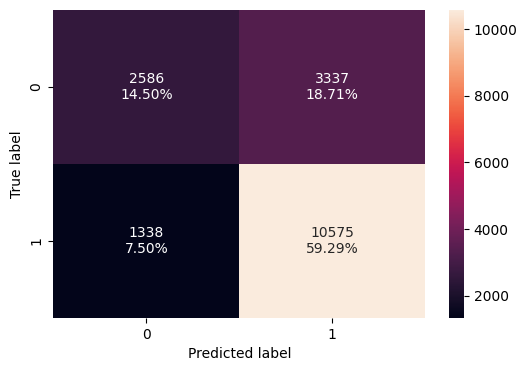

In [ ]:
# confusion matrix on train data
confusion_matrix_sklearn(ada, X_train, y_train)

In [ ]:
# performance check on train data
ada_perf_train = model_performance_classification_sklearn(ada, X_train, y_train)
ada_perf_train

,Accuracy,Recall,Precision,F1
0,0.73789,0.887686,0.760135,0.818974


### Check performance on Test data

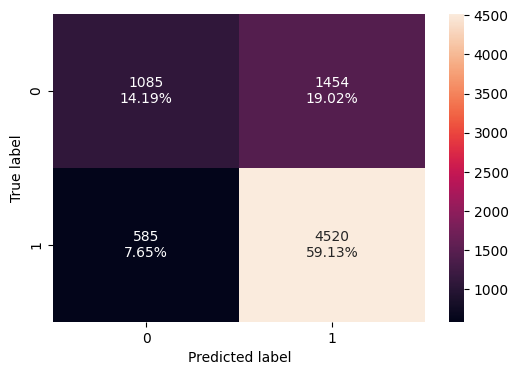

In [ ]:
#confusion matrix on test data
confusion_matrix_sklearn(ada, X_test, y_test)

In [ ]:
#performance check on test data
ada_perf_test = model_performance_classification_sklearn(ada, X_test, y_test)
ada_perf_test

,Accuracy,Recall,Precision,F1
0,0.733255,0.885406,0.756612,0.815958


## Hyperparameter Tuning - AdaBoost Classifier

In [ ]:
#type of classifier
ada_estimator_tuned = AdaBoostClassifier(random_state=1)

#Parameter grid
ada_parameter = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

#Type of scoring used
scoring = metrics.make_scorer(metrics.f1_score)

#Running Grid search with cv = 5
ada_grid = GridSearchCV(ada_estimator_tuned, param_grid=ada_parameter, cv=5, scoring=scoring)

#fitting ada_grid on the train data
ada_grid = ada_grid.fit(X_train, y_train)

#set clf to best combination of parameters
ada_estimator_tuned = ada_grid.best_estimator_

#fit best algorithm to the dataset
ada_estimator_tuned.fit(X_train, y_train)



AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, random_state=1)

### Performance check on train data

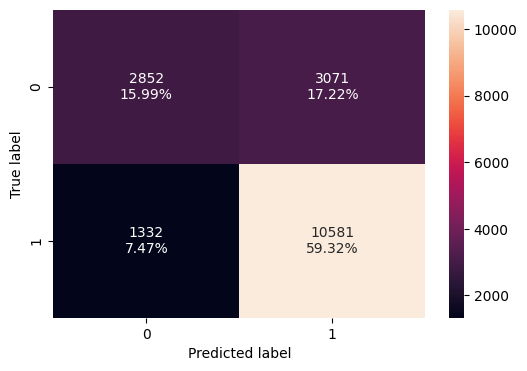

In [ ]:
# confusion matrix for tuned train data
confusion_matrix_sklearn(ada_estimator_tuned, X_train, y_train)

In [ ]:
#performance check for tuned train data
ada_perf_train2 = model_performance_classification_sklearn(ada_estimator_tuned, X_train, y_train)
ada_perf_train2

,Accuracy,Recall,Precision,F1
0,0.75314,0.888189,0.775051,0.827772


### Performance check on test data

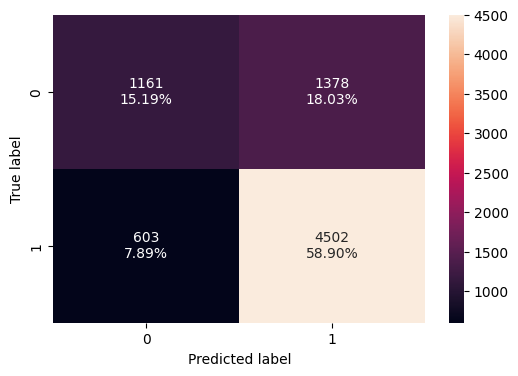

In [ ]:
#confusion matrox for tuned test data
confusion_matrix_sklearn(ada_estimator_tuned, X_test, y_test)

In [ ]:
#performance check for tuned test data
ada_perf_test2 = model_performance_classification_sklearn(ada_estimator_tuned, X_test, y_test)
ada_perf_test2


,Accuracy,Recall,Precision,F1
0,0.740842,0.881881,0.765646,0.819663


## Gradient Boosting Classifer


In [ ]:
#define gradient boosting classifer with random stat = 1
gb = GradientBoostingClassifier(random_state=1)

#fitting gradient boosting on train data
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

### Performance check on training data


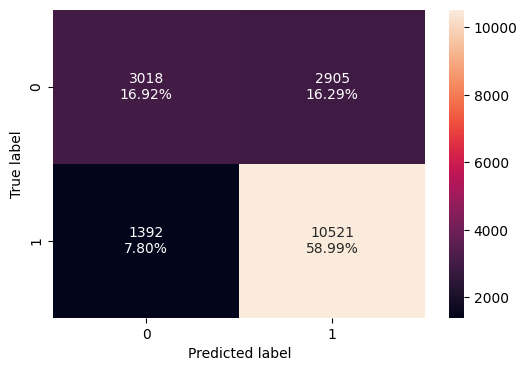

In [ ]:
#confusion matrix
confusion_matrix_sklearn(gb, X_train, y_train)

In [ ]:
#performance check
gb_perf_train = model_performance_classification_sklearn(gb, X_train, y_train)
gb_perf_train

,Accuracy,Recall,Precision,F1
0,0.759083,0.883153,0.783629,0.83042


### Performance check on testing data


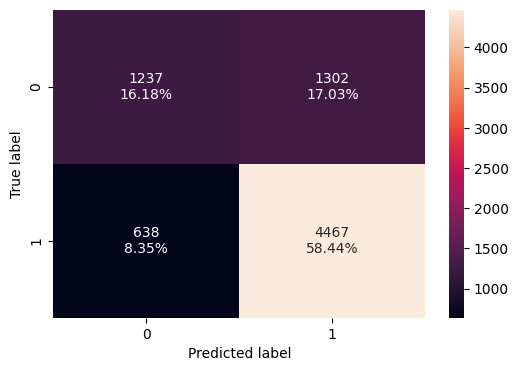

In [ ]:
#confusion matrix
confusion_matrix_sklearn(gb, X_test, y_test)

In [ ]:
#performance check
gb_perf_test = model_performance_classification_sklearn(gb, X_test, y_test)
gb_perf_test

,Accuracy,Recall,Precision,F1
0,0.746206,0.875024,0.774311,0.821593


## Hyperparameter Tuning - Gradient Boosting Classifier

In [ ]:
#Type of classifier
gb_estimator_tuned = GradientBoostingClassifier(random_state=1)

#parameter grid
gb_parameter = {"init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

#Type of scoring
gb_scoring = metrics.make_scorer(metrics.f1_score)

#run grid search with cv = 5
gb_grid = GridSearchCV(gb_estimator_tuned, param_grid=gb_parameter, cv=5, scoring=gb_scoring)

#fitting gb_grid on the train data
gb_grid = gb_grid.fit(X_train, y_train)

#set clf to best combination of parameters
gb_estimator_tuned = gb_grid.best_estimator_

#fit best algorithm to the dataset
gb_estimator_tuned.fit(X_train, y_train)


GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7, random_state=1,
                           subsample=0.9)

### Check performance on training data

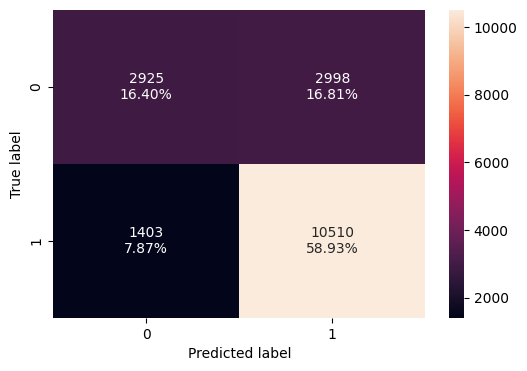

In [ ]:
#confusion matrix
confusion_matrix_sklearn(gb_estimator_tuned, X_train, y_train)

In [ ]:
#performance check
gb_perf_train2 = model_performance_classification_sklearn(gb_estimator_tuned, X_train, y_train)
gb_perf_train2

,Accuracy,Recall,Precision,F1
0,0.753252,0.882229,0.778057,0.826875


### Check performance on testing data

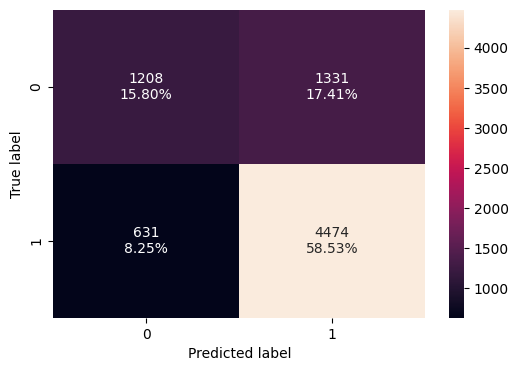

In [ ]:
#confusion matrix
confusion_matrix_sklearn(gb_estimator_tuned, X_test, y_test)

In [ ]:
#performance check
gb_perf_test2 = model_performance_classification_sklearn(gb_estimator_tuned, X_test, y_test)
gb_perf_test2

,Accuracy,Recall,Precision,F1
0,0.743328,0.876396,0.770715,0.820165


## XGBoost Classifier


In [ ]:
# Define XGBoost with random state =  1 and eval_metric = 'logloss'
xgb = XGBClassifier(random_state=1, eval_metric='logloss')

#fitting XGBoost on train data
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

### Check performance on Training data


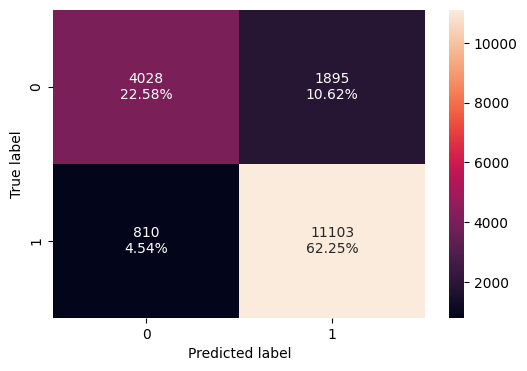

In [ ]:
# confusion matrix for train dataset
confusion_matrix_sklearn(xgb, X_train, y_train)

In [ ]:
# performance check on train dataset
xgb_perf_train = model_performance_classification_sklearn(xgb, X_train, y_train)
xgb_perf_train

,Accuracy,Recall,Precision,F1
0,0.84834,0.932007,0.854208,0.891413


### Checking performance on Testing Data

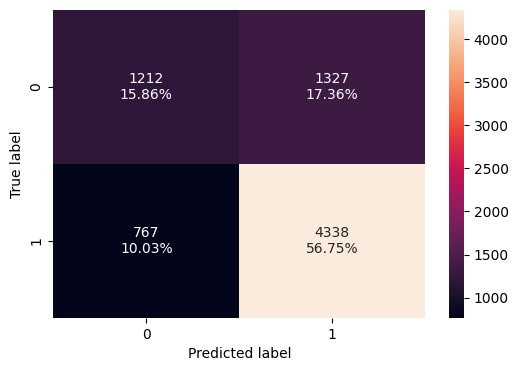

In [ ]:
# confusion matrix for test dataset
confusion_matrix_sklearn(xgb, X_test, y_test)

In [ ]:
# Performance check on test dataset
xgb_perf_test = model_performance_classification_sklearn(xgb, X_test, y_test)
xgb_perf_test

,Accuracy,Recall,Precision,F1
0,0.72606,0.849755,0.765755,0.805571


## Hyperparameter Tuning - XGBoost Classifier


In [ ]:
#Classifier type
xgb_estimator_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid param
xgb_estimator_param = {'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

#Type of scoring
xgb_scoring = metrics.make_scorer(metrics.f1_score)

# Running Grid search with cv = 5
xgb_grid = GridSearchCV(xgb_estimator_tuned, param_grid=xgb_estimator_param, cv=5, scoring=xgb_scoring)

#fitting xgb_grid on the train data
xgb_grid = xgb_grid.fit(X_train, y_train)

#set clf to best combination of parameters
xgb_estimator_tuned = xgb_grid.best_estimator_

#fit best algorithm to the dataset
xgb_estimator_tuned.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

### Checking performance on Training dataset:

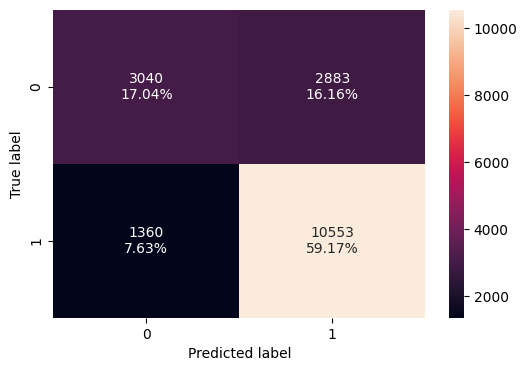

In [ ]:
# confusion matrix
confusion_matrix_sklearn(xgb_estimator_tuned, X_train, y_train)


In [ ]:
# performance test
xgb_perf_train2 = model_performance_classification_sklearn(xgb_estimator_tuned, X_train, y_train)
xgb_perf_train2

,Accuracy,Recall,Precision,F1
0,0.76211,0.885839,0.785427,0.832617


### Checking performance on Testing dataset:

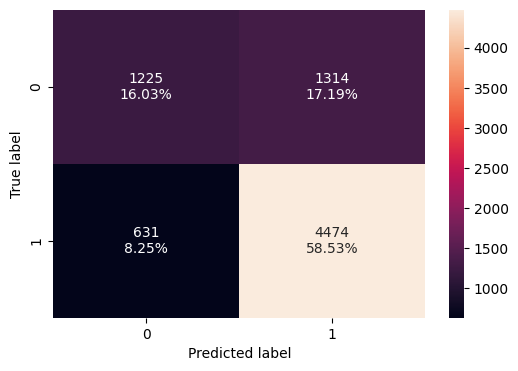

In [ ]:
#confusion matrix
confusion_matrix_sklearn(xgb_estimator_tuned, X_test, y_test)


In [ ]:
# performance test
xgb_perf_test2 = model_performance_classification_sklearn(xgb_estimator_tuned, X_test, y_test)
xgb_perf_test2

,Accuracy,Recall,Precision,F1
0,0.745552,0.876396,0.772979,0.821445


## Suggested Parameter

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

## Stacking Classifier:


In [ ]:
stack_estimator = [('AdaBoost', ada), ('Gradient Boosting', gb_estimator_tuned) , ('Random Forest', rf_estimator_tuned)]

final_est = xgb_estimator_tuned

stack = StackingClassifier(estimators=stack_estimator, final_estimator=final_est, cv=5)

stack.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           learning_rate=0.05,
                                                           max_features=0.7,
                                                           random_state=1,
                                                           subsample=0.9)),
                               ('Random Forest',
                                RandomForestClassifier(max_samples=0.4,
                                                       min_samples_leaf=3,
                                                       n_estimators=110,
                                                       oob_score=True,
                                                       random...
                                                 feature_types=None, gamma=3,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.05,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=50, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

### checking performance on Training dataset:


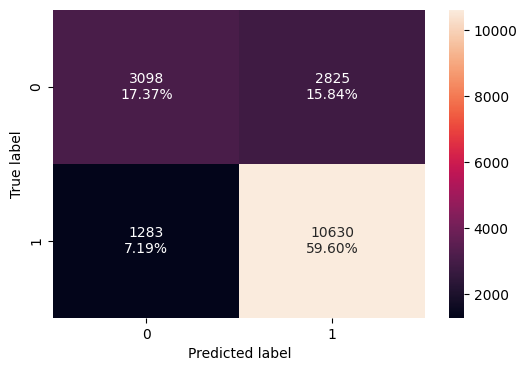

In [ ]:
#confusion matrix
confusion_matrix_sklearn(stack, X_train, y_train)

In [ ]:
#performance check
stack_perf_train = model_performance_classification_sklearn(stack, X_train, y_train)
stack_perf_train

,Accuracy,Recall,Precision,F1
0,0.769679,0.892303,0.790041,0.838064


### Checking performance on Testing dataset:

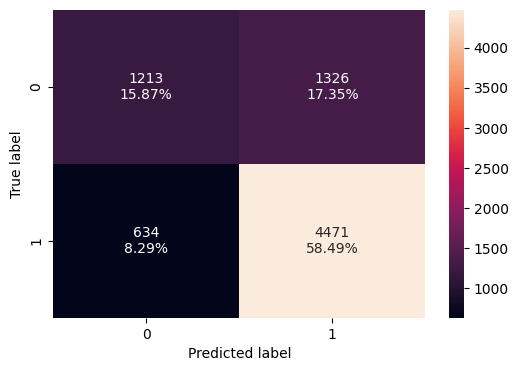

In [ ]:
# confusion matrix
confusion_matrix_sklearn(stack, X_test, y_test)

In [ ]:
# performance check
stack_perf_test = model_performance_classification_sklearn(stack, X_test, y_test)
stack_perf_test

,Accuracy,Recall,Precision,F1
0,0.74359,0.875808,0.771261,0.820216


# Model Performance Comparison and Conclusions

## Training performance comparison


In [ ]:
# Training performance comparision
models_train_compare = pd.concat([bc_perf_train.T, bc_perf_train2.T, dt_perf_train.T, dt_perf_train2.T, rf_perf_train.T, rf_perf_train2.T, ada_perf_train.T, ada_perf_train2.T, gb_perf_train.T, gb_perf_train2.T, xgb_perf_train.T, xgb_perf_train2.T, stack_perf_train.T], axis=1)

models_train_compare.columns = ['Bagging classifer', 'Bagging classifer tuned','Decision Tree', 'Decision Tree Tuned', 'Random Forest', 'Random Forest Tuned', 'AdaBoost', 'AdaBoost Tuned', 'Gradient Boosting', 'Gradient Boosting Tuned', 'XGBoost', 'XGBoost Tuned', 'Stacking']

print('Training Performance Comparison')
models_train_compare

Training Performance Comparison


,Bagging classifer,Bagging classifer tuned,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,AdaBoost,AdaBoost Tuned,Gradient Boosting,Gradient Boosting Tuned,XGBoost,XGBoost Tuned,Stacking
Accuracy,0.985367,0.998710,1.0,0.710193,1.0,0.795077,0.737890,0.753140,0.759083,0.753252,0.848340,0.762110,0.769679
Recall,0.986317,0.999916,1.0,0.725762,1.0,0.908587,0.887686,0.888189,0.883153,0.882229,0.932007,0.885839,0.892303
Precision,0.991729,0.998157,1.0,0.819681,1.0,0.808364,0.760135,0.775051,0.783629,0.778057,0.854208,0.785427,0.790041
F1,0.989016,0.999036,1.0,0.769868,1.0,0.855551,0.818974,0.827772,0.830420,0.826875,0.891413,0.832617,0.838064


## Testing Performance comparison

In [ ]:
# Testing performance comparison
models_test_compare = pd.concat([bc_perf_test.T,
                                 bc_perf_test2.T,
                                 dt_perf_test.T,
                                 dt_perf_test2.T,
                                 rf_perf_test.T,
                                 rf_perf_test2.T,
                                 ada_perf_test.T,
                                 ada_perf_test2.T,
                                 gb_perf_test.T,
                                 gb_perf_test2.T,
                                 xgb_perf_test.T,
                                 xgb_perf_test2.T,
                                 stack_perf_test.T

],  axis=1) # Concatenate along columns instead of rows

models_test_compare.columns= ['Bagging classifer', 'Bagging classifer Tuned','Decision Tree', 'Decision Tree Tuned', 'Random Forest', 'Random Forest Tuned', 'AdaBoost', 'AdaBoost Tuned', 'Gradient Boosting', 'Gradient Boosting Tuned', 'XGBoost', 'XGBoost Tuned', 'Stacking']

print('Testing Performance Comparison')

models_test_compare

Testing Performance Comparison


,Bagging classifer,Bagging classifer Tuned,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,AdaBoost,AdaBoost Tuned,Gradient Boosting,Gradient Boosting Tuned,XGBoost,XGBoost Tuned,Stacking
Accuracy,0.692177,0.725013,0.664443,0.707483,0.721743,0.742674,0.733255,0.740842,0.746206,0.743328,0.726060,0.745552,0.743590
Recall,0.766112,0.887365,0.742605,0.726543,0.841724,0.873066,0.885406,0.881881,0.875024,0.876396,0.849755,0.876396,0.875808
Precision,0.771400,0.747895,0.751884,0.815344,0.765135,0.771641,0.756612,0.765646,0.774311,0.770715,0.765755,0.772979,0.771261
F1,0.768747,0.811682,0.747216,0.768386,0.801604,0.819226,0.815958,0.819663,0.821593,0.820165,0.805571,0.821445,0.820216


## Testing vs. Training model comparison

In [ ]:
# Training vs Testing model comparison
model_compare = pd.concat([models_train_compare, models_test_compare], axis=0, keys=['Train', 'Test']) # Use keys to set multi-index
print('Training vs Testing model comparison:')
model_compare

Training vs Testing model comparison:


Bagging classifer  Bagging classifer tuned  Decision Tree  \
Train Accuracy            0.985367                 0.998710       1.000000   
      Recall              0.986317                 0.999916       1.000000   
      Precision           0.991729                 0.998157       1.000000   
      F1                  0.989016                 0.999036       1.000000   
Test  Accuracy            0.692177                      NaN       0.664443   
      Recall              0.766112                      NaN       0.742605   
      Precision           0.771400                      NaN       0.751884   
      F1                  0.768747                      NaN       0.747216   

                 Decision Tree Tuned  Random Forest  Random Forest Tuned  \
Train Accuracy              0.710193       1.000000             0.795077   
      Recall                0.725762       1.000000             0.908587   
      Precision             0.819681       1.000000             0.808364   
      F1                    0.769868       1.000000             0.855551   
Test  Accuracy              0.707483       0.721743             0.742674   
      Recall                0.726543       0.841724             0.873066   
      Precision             0.815344       0.765135             0.771641   
      F1                    0.768386       0.801604             0.819226   

                 AdaBoost  AdaBoost Tuned  Gradient Boosting  \
Train Accuracy   0.737890        0.753140           0.759083   
      Recall     0.887686        0.888189           0.883153   
      Precision  0.760135        0.775051           0.783629   
      F1         0.818974        0.827772           0.830420   
Test  Accuracy   0.733255        0.740842           0.746206   
      Recall     0.885406        0.881881           0.875024   
      Precision  0.756612        0.765646           0.774311   
      F1         0.815958        0.819663           0.821593   

                 Gradient Boosting Tuned   XGBoost  XGBoost Tuned  Stacking  \
Train Accuracy                  0.753252  0.848340       0.762110  0.769679   
      Recall                    0.882229  0.932007       0.885839  0.892303   
      Precision                 0.778057  0.854208       0.785427  0.790041   
      F1                        0.826875  0.891413       0.832617  0.838064   
Test  Accuracy                  0.743328  0.726060       0.745552  0.743590   
      Recall                    0.876396  0.849755       0.876396  0.875808   
      Precision                 0.770715  0.765755       0.772979  0.771261   
      F1                        0.820165  0.805571       0.821445  0.820216   

                 Bagging classifer Tuned  
Train Accuracy                       NaN  
      Recall                         NaN  
      Precision                      NaN  
      F1                             NaN  
Test  Accuracy                  0.725013  
      Recall                    0.887365  
      Precision                 0.747895  
      F1                        0.811682

## Important features:

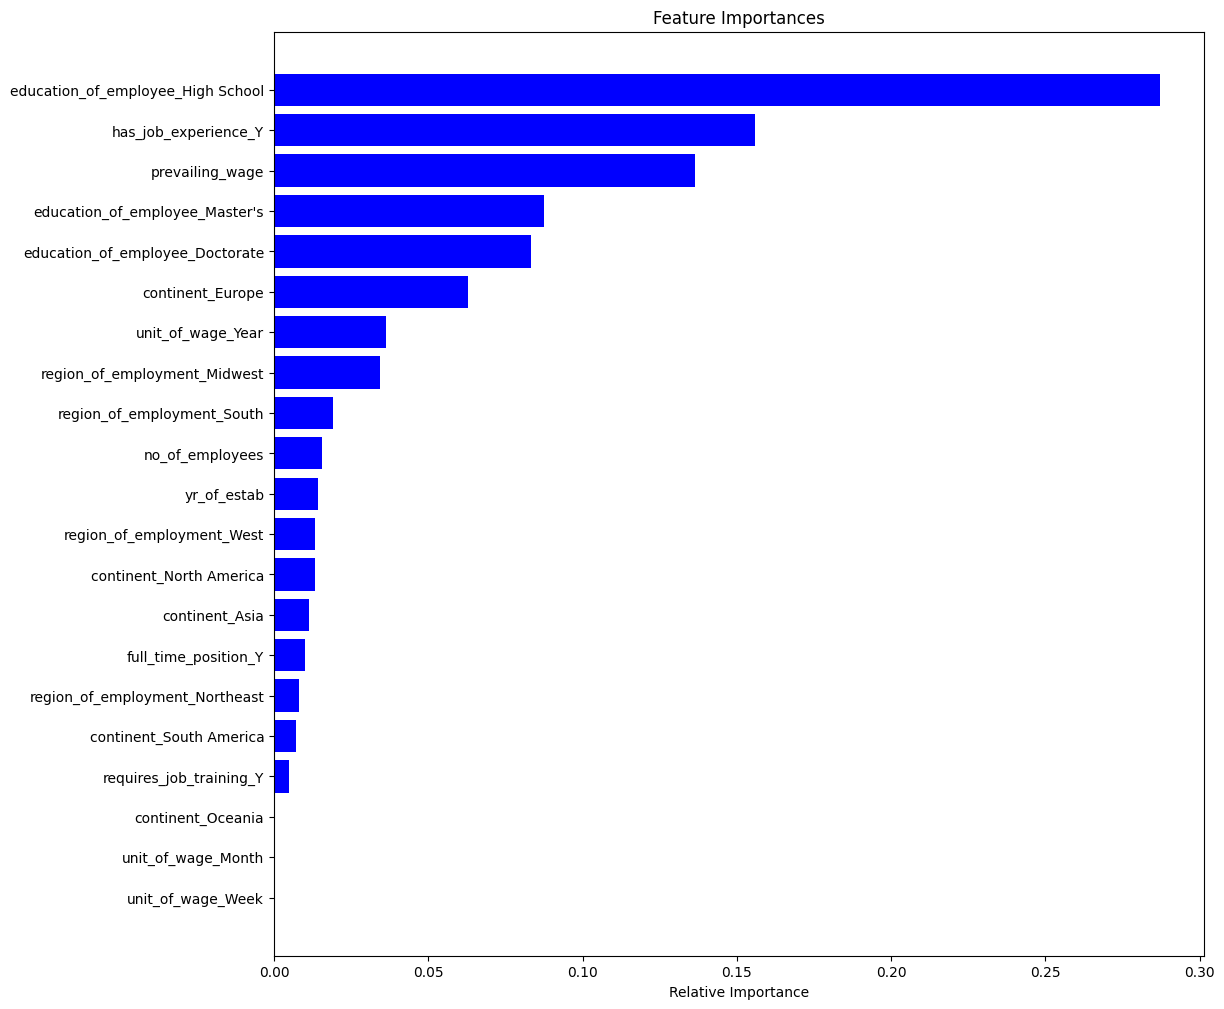

In [ ]:
features = X_train.columns
importances = gb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


# Actionable Insights and Recommendations

From the Analysis, we can conclude that these are the factor differentiate applications that were approved vs. denied:
- Employee with a minimum education is Highschool
- With relative job experience
- High prevailing wages. This is to ensure workers are fairly compensated
- Fair amount of peopple coming from Europe.
- Amount of workers coming from North America, SOuth America, and Asia are low
- Air amount of employment region applying to: Midwest, South, and south
- Employer's years of establishment and employee are fairly low. These could be small businesses.
- WOrkers only get approved when applying for Full-time position

Based on the Important features from approved case. We can recommend these criteria for the OFLC determine if a worker could be qualify:
- Minimum required education: Highschool (25% - 30%)
- Relative job experience (15% - 20%)
- Applying for position with high prevailing wages (10% - 15%)

Once the top 3 condition has been satisfied we can also taking additional factor for further qualification purposes:
- Types of jobs applied (Fulltime vs. Parttime position)
- Region of emplyment
- Continent of origin

After all conditions listed are achieved, the OFLC can determine which cases can be "Approved" or "Denied".